In [1]:
import os
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import datetime as dttm
import romer_utils as ru

In [2]:
def linfunc(x, a):
    return a * x
def affine(x, a, b):
    return a * x + b
fitfunc = affine

In [3]:
x = []
y = []
for n in range(10,97):
    # Encontra as datas de um quarteto
    date_oi, date_of = ru.get_date_cbracket(ru.IDATES, ru.QAPR, n)
    date_ei, date_ef = ru.get_date_cbracket(ru.EDATES, ru.QREG, n)
    # Procura os eventos de cada data
    oi = ru.event_of_date(date_oi, ru.OCCULS)
    of = ru.event_of_date(date_of, ru.OCCULS)
    ei = ru.event_of_date(date_ei, ru.EMERGS)
    ef = ru.event_of_date(date_ef, ru.EMERGS)
    dd = (ef.d - ei.d) - (of.d - oi.d)
    dt = ((ef.t - ei.t) - (of.t - oi.t)).total_seconds()
    y.append(dt)
    x.append(dd)
x=np.array(x)
y=np.array(y)
pars, err = curve_fit(fitfunc, x, y)
xc = np.array([x.min(), x.max()])
yc = fitfunc(xc, *pars)


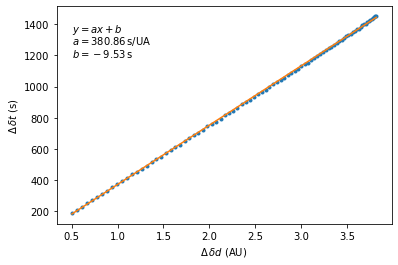

In [4]:
plt.plot(x,y,'.', xc,yc,'-');
plt.xlabel(r"$\Delta\,\delta d$ (AU)")
plt.ylabel(r"$\Delta\,\delta t$ (s)")
plt.text(0.5,1350,r"$y=ax+b$")
plt.text(0.5,1270,r"$a={:.2f}\,$s/UA".format(pars[0]))
plt.text(0.5,1190,r"$b={:.2f}\,$s".format(pars[1]))
plt.savefig("f100.png",dpi=100)

In [5]:
ru.AU/pars[0]

392788630.66544724